In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

In [2]:
df = pd.read_csv("/content/Alphabets_data.csv")
print("Dataset shape:", df.shape)

Dataset shape: (20000, 17)


In [3]:
# Identify target column
target_col = "letter"

In [4]:
# Data Exploration
print("\n--- Dataset Info ---")
print(df.info())
print("\nMissing values per column:\n", df.isna().sum())
print("\nClass distribution:\n", df[target_col].value_counts())


--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   letter  20000 non-null  object
 1   xbox    20000 non-null  int64 
 2   ybox    20000 non-null  int64 
 3   width   20000 non-null  int64 
 4   height  20000 non-null  int64 
 5   onpix   20000 non-null  int64 
 6   xbar    20000 non-null  int64 
 7   ybar    20000 non-null  int64 
 8   x2bar   20000 non-null  int64 
 9   y2bar   20000 non-null  int64 
 10  xybar   20000 non-null  int64 
 11  x2ybar  20000 non-null  int64 
 12  xy2bar  20000 non-null  int64 
 13  xedge   20000 non-null  int64 
 14  xedgey  20000 non-null  int64 
 15  yedge   20000 non-null  int64 
 16  yedgex  20000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB
None

Missing values per column:
 letter    0
xbox      0
ybox      0
width     0
height    0
onpix     0
xbar      0
ybar      0
x2ba

In [5]:
# Data Preprocessing
X = df.drop(columns=[target_col])
y = df[target_col]

# Encode labels
le = LabelEncoder()
y = le.fit_transform(y)

# Train-test split (stratified)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

# Scale features
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
# Baseline ANN Model
baseline_mlp = MLPClassifier(
    hidden_layer_sizes=(64,),
    activation="relu",
    solver="adam",
    learning_rate_init=1e-3,
    max_iter=300,
    early_stopping=True,
    random_state=42
)

baseline_mlp.fit(X_train, y_train)
y_pred_base = baseline_mlp.predict(X_test)

In [7]:
# Evaluation
print("\n--- Baseline MLP ---")
print("Accuracy:", accuracy_score(y_test, y_pred_base))
print("Precision:", precision_score(y_test, y_pred_base, average="macro"))
print("Recall:", recall_score(y_test, y_pred_base, average="macro"))
print("F1 Score:", f1_score(y_test, y_pred_base, average="macro"))
print("\nClassification Report:\n", classification_report(y_test, y_pred_base))


--- Baseline MLP ---
Accuracy: 0.74875
Precision: 0.7541291527847827
Recall: 0.7477821312025779
F1 Score: 0.748280317473059

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.88      0.88       158
           1       0.60      0.80      0.69       153
           2       0.81      0.79      0.80       147
           3       0.65      0.79      0.71       161
           4       0.69      0.82      0.75       154
           5       0.69      0.74      0.72       155
           6       0.67      0.54      0.60       155
           7       0.72      0.55      0.62       147
           8       0.91      0.78      0.84       151
           9       0.82      0.78      0.80       149
          10       0.69      0.68      0.68       148
          11       0.88      0.78      0.83       152
          12       0.87      0.89      0.88       158
          13       0.87      0.79      0.83       157
          14       0.75      0.73      

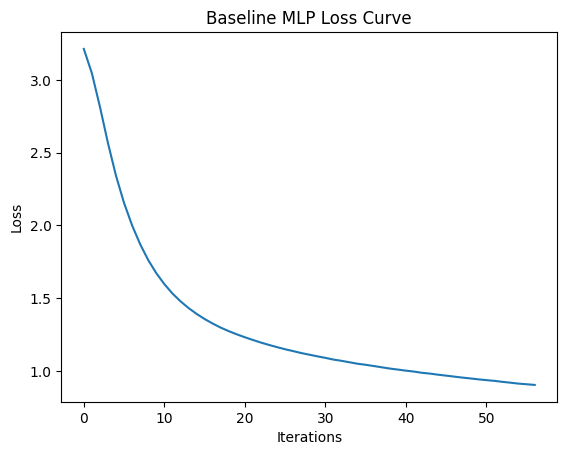

In [8]:
# Loss curve
plt.plot(baseline_mlp.loss_curve_)
plt.title("Baseline MLP Loss Curve")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.show()

In [ ]:
# Hyperparameter Tuning
param_dist = {
    "hidden_layer_sizes": [(32,), (64,), (128,), (64, 32)],
    "activation": ["relu", "tanh"],
    "alpha": [1e-4, 1e-3, 1e-2],
    "learning_rate_init": [1e-3, 1e-4],
    "batch_size": [32, 64]
}

mlp = MLPClassifier(
    solver="adam",
    max_iter=300,
    early_stopping=True,
    random_state=42
)

search = RandomizedSearchCV(
    mlp, param_distributions=param_dist, n_iter=10,
    scoring="accuracy", cv=3, random_state=42, verbose=2
)
search.fit(X_train, y_train)

print("\nBest Params:", search.best_params_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END activation=tanh, alpha=0.01, batch_size=32, hidden_layer_sizes=(32,), learning_rate_init=0.001; total time=  26.3s
[CV] END activation=tanh, alpha=0.01, batch_size=32, hidden_layer_sizes=(32,), learning_rate_init=0.001; total time=  11.1s
[CV] END activation=tanh, alpha=0.01, batch_size=32, hidden_layer_sizes=(32,), learning_rate_init=0.001; total time=  28.3s
[CV] END activation=tanh, alpha=0.001, batch_size=64, hidden_layer_sizes=(128,), learning_rate_init=0.0001; total time=  29.5s
[CV] END activation=tanh, alpha=0.001, batch_size=64, hidden_layer_sizes=(128,), learning_rate_init=0.0001; total time=  35.4s
[CV] END activation=tanh, alpha=0.001, batch_size=64, hidden_layer_sizes=(128,), learning_rate_init=0.0001; total time=  34.7s
[CV] END activation=tanh, alpha=0.001, batch_size=64, hidden_layer_sizes=(32,), learning_rate_init=0.0001; total time=  23.2s


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=64, hidden_layer_sizes=(32,), learning_rate_init=0.0001; total time=  45.4s


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, batch_size=64, hidden_layer_sizes=(32,), learning_rate_init=0.0001; total time=  38.1s
[CV] END activation=tanh, alpha=0.01, batch_size=64, hidden_layer_sizes=(64, 32), learning_rate_init=0.001; total time=  20.6s
[CV] END activation=tanh, alpha=0.01, batch_size=64, hidden_layer_sizes=(64, 32), learning_rate_init=0.001; total time=  19.5s


In [ ]:
# Evaluate best model
best_mlp = search.best_estimator_
y_pred_best = best_mlp.predict(X_test)

print("\n--- Tuned MLP ---")
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("Precision:", precision_score(y_test, y_pred_best, average="macro"))
print("Recall:", recall_score(y_test, y_pred_best, average="macro"))
print("F1 Score:", f1_score(y_test, y_pred_best, average="macro"))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best))

# Confusion Matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_best))